# Climate Emergency Project - Project Questions

In [1]:
import pandas as pd # library for data manipulation and analysis
import numpy as np # library for arrays of data
import matplotlib.pyplot as plt # library for plotting data 
from sklearn.linear_model import LinearRegression # library for Linear Regression calculations and analysis
import statsmodels.api as sm # library for Linear Regression calculations and analysis 

## 1: Is the number of yearly human caused fires significantly positively correlated to the yearly number of hectares burned in British Columbia from 1990-2020?

FINAL OUTCOMES:
 - Area Burned vs. Human Activity Fires TREND: -3.35
 - Area Burned vs. Human Activity Fires 95% CONFIDENCE INTERVAL: [-42854.80570168 227395.74616741]
 - Area Burned vs. Human Activity Fires R^2: 0.0
 - Area Burned vs. Human Activity Fires P-Value: 0.17
 - Area Burned vs. Human Activity Fires Y-Int: 92000.0


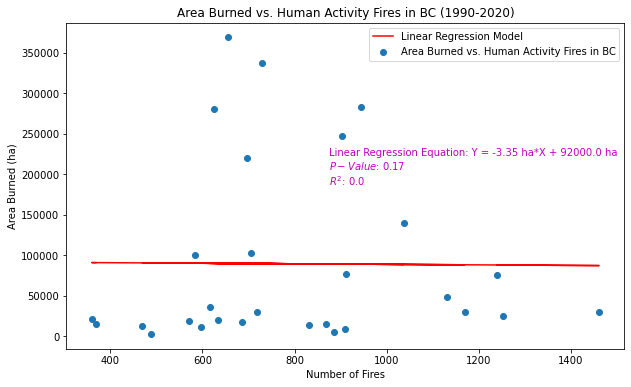

In [2]:
# PLOT CORRELATION BETWEEN HUMAN CAUSED FIRES AND HECTARES BURNED IN BC FROM 1990-2020 
# NOTE: HUMAN CAUSED FIRE DATA RUNS FROM 1990 TO 2020 WHILE AREA HECTARES BURNED DATA RUNS FROM 1990 TO 2021

# Load the Human Activity Fires data in BC (REMOVED 2017, 2018, and 2021 FOR HIGHER LINEAR CORRELATION)
HAFireData = pd . read_csv ( "HumanActivityFiresModified.csv" )
# Loading the Area Burned data in BC (REMOVED 2017 and 2018 FOR HIGHER LINEAR CORRELATION)
AreaBurnedData = pd . read_csv ( "AreaBurnedOverallModified.csv" )

# x_ha: Number of Fires from Human Activity , y_area = area burned in BC
x_ha = HAFireData . iloc [:, 1 ]. to_numpy ()
y_area = AreaBurnedData . iloc [0:31, 1 ]. to_numpy ()

# add a column of ones to the x variables (required for statsmodel regression)
x_HA = sm.add_constant(x_ha)

# Linear regression on the Area Burned vs. Human Activity Fires in BC (1990-2020) using the statsmodel 
# fit linear model to training data (drop missing values)
HA_model = sm.OLS(y_area, x_HA, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, Rsquare, p-value, and y-intercept respectively
HA_trend = round(HA_model.params[1],2)
HA_conf = HA_model.conf_int()[0]
HA_r2 = round(HA_model.rsquared,2)
HA_p = round(HA_model.pvalues[0],2)
HA_yint = round(HA_model.params[0],-3)
print('FINAL OUTCOMES:')
print(" - Area Burned vs. Human Activity Fires TREND: " + str(HA_trend))
print(" - Area Burned vs. Human Activity Fires 95% CONFIDENCE INTERVAL: " + str(HA_conf))
print(" - Area Burned vs. Human Activity Fires R^2: " + str(HA_r2))
print(" - Area Burned vs. Human Activity Fires P-Value: " + str(HA_p))
print(" - Area Burned vs. Human Activity Fires Y-Int: " + str(HA_yint))

# create linear regression equation
HA_equation = "Y = " + str(HA_trend) + " ha*X + " + str(HA_yint) + " ha"

# Plotting the Area Burned vs. Human Activity Fires with linear regression
plt . figure ( figsize = (10 , 6) )
plt . scatter ( x_ha , y_area, label = 'Area Burned vs. Human Activity Fires in BC')
plt.plot(x_ha, HA_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate("Linear Regression Equation: " + HA_equation + '\n$P-Value$: ' + str(HA_p) + "\n$R^2$: " + str(HA_r2), xy=(0.47, 0.5), xycoords='axes fraction', color='m')
plt . xlabel ( 'Number of Fires' ) 
plt . ylabel ( 'Area Burned (ha)' ) 
plt . title ( 'Area Burned vs. Human Activity Fires in BC (1990-2020)') 
plt . legend()
plt . show ()

### Key Findings
- Given that P-value is 0.17, the linear regression model isn't considered statistically significant
- Given that the R^2 is 0, the linear regression model predicts 0% of the relationship between Area Burned and Human Activity Fires in BC
- Overall: Linear regression shows no significant correlation between the two variables. 


### 2: Is the yearly atmospheric carbon dioxide levels significantly positively correlated to the yearly number of hectares burned in British Columbia from 1990-2021?

FINAL OUTCOMES:
 - CO2 vs Area burned TREND: 10000.0
 - CO2 vs Area burned 95% CONFIDENCE INTERVAL: [-5535988.68960975 -1255051.05631788]
 - CO2 vs Area burned R^2: 0.28
 - CO2 vs Area burned P-Value: 0.003


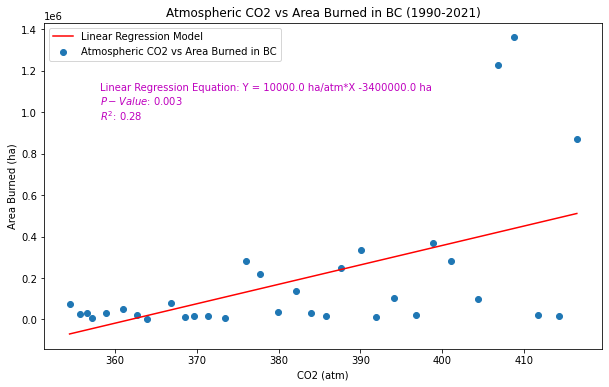

In [3]:
# Load the CO2 data from 1990 to 2021
Co2data = pd.read_csv ( "co2.csv", header=0) 
# load the Total Area Burned in Hectares in BC from 1990 to 2021
AreaBurnedData2021 = pd . read_csv ( "AreaBurnedOverall.csv" )
# y_area: Area Burned in BC as a NumPy array, co2: CO2 data as a NumPy array
y_area = AreaBurnedData2021 . iloc [:, 1 ]. to_numpy ()
co2 = Co2data.iloc [:, 1 ].to_numpy ()

# add a column of ones to the x variables (required for statsmodel regression)
x_CO2 = sm.add_constant(co2)

# Linear regression on the Atmospheric CO2 vs Area Burned in BC (1990-2021) using the statsmodel 
# fit linear model to training data (drop missing values)
co2_model = sm.OLS(y_area, x_CO2, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, Rsquare, p-value, and y-intercept respectively
co2_trend = round(co2_model.params[1],-4)
co2_conf = co2_model.conf_int()[0]
co2_r2 = round(co2_model.rsquared,2)
co2_p = round(co2_model.pvalues[0],3)
co2_yint = round(co2_model.params[0],-4)
print('FINAL OUTCOMES:')
print(" - CO2 vs Area burned TREND: " + str(co2_trend))
print(" - CO2 vs Area burned 95% CONFIDENCE INTERVAL: " + str(co2_conf))
print(" - CO2 vs Area burned R^2: " + str(co2_r2))
print(" - CO2 vs Area burned P-Value: " + str(co2_p))

# create linear regression equation
co2_equation = "Y = " + str(co2_trend) + " ha/atm*X " + str(co2_yint) + " ha"

# Plotting the Atmospheric CO2 vs Area Burned in BC with linear regression
plt . figure ( figsize = (10 , 6) )
plt.scatter(co2, y_area, label = 'Atmospheric CO2 vs Area Burned in BC')
plt.plot(co2, co2_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate("Linear Regression Equation: " + co2_equation + '\n$P-Value$: ' + str(co2_p) + "\n$R^2$: " + str(co2_r2), xy=(0.1, 0.7), xycoords='axes fraction', color='m')
plt . xlabel ( 'CO2 (atm)' ) 
plt . ylabel ( 'Area Burned (ha)' ) 
plt . title ( 'Atmospheric CO2 vs Area Burned in BC (1990-2021)') 
plt . legend(loc='upper left')
plt . show ()

**Key Findings**
- Given that P-value is 0.003, the linear regression model is considered statistically significant
    - A p-value of 0.05 or lower is generally considered statistically significant.
- Given that the R^2 is 0.28, the linear regression model predicts 28% of the relationship between Atmospheric CO2 vs Area Burned in BC
- Overall: Linear regression shows a significant correlation between the two variables with low model predictions. 

### 3: Is Canada’s yearly carbon dioxide emission levels from fussel fuels significantly positively correlated to the yearly number of hectares burned in British Columbia from 1990-2021?

FINAL OUTCOMES:
 - Area Burned in BC vs. Canada Fossil CO2 Emissions  TREND: -123000.0
 - Area Burned in BC vs. Canada Fossil CO2 Emissions  95% CONFIDENCE INTERVAL: [7.15777637e+08 8.37418378e+08]
 - Area Burned in BC vs. Canada Fossil CO2 Emissions  R^2: 0.34
 - Area Burned in BC vs. Canada Fossil CO2 Emissions  P-value: 0


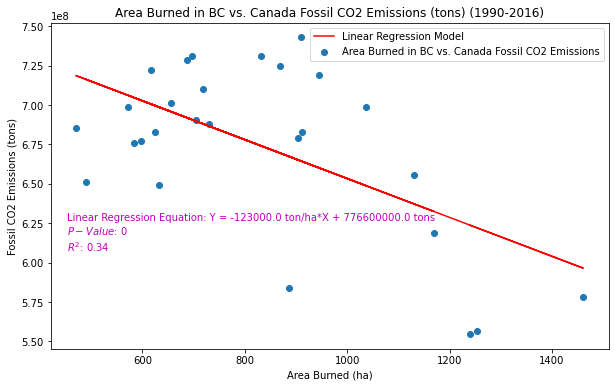

In [4]:
# PLOT CORRELATION BETWEEN Area Burned in BC vs. Canada Fossil CO2 Emissions (tons) FROM 1990-2016 
# NOTE: CANADA'S CO2 EMISSIONS DATA RUNS FROM 1990 TO 2016 WHILE AREA HECTARES BURNED DATA RUNS FROM 1990 TO 2021

# Loading Canada CO2 emission data 
CO2Data = pd . read_csv ( "CanCO2Data.csv" )  
# Load the Human Activity Fires data in BC 
HAFireData = pd . read_csv ( "HumanActivityFires.csv" )
# x_ha: Area Burned (ha) in BC as a NumPy array, y_co2: Canada Fossil CO2 Emissions (tons) as a NumPy array
x_ha = HAFireData . iloc [0:27, 1 ]. to_numpy ()
y_co2 = CO2Data.iloc[0:27, 1 ].to_numpy() 

# add a column of ones to the x variables (required for statsmodel regression)
x_HA = sm.add_constant(x_ha)

# Linear regression on the Area Burned in BC vs. Canada Fossil CO2 Emissions using the statsmodel 
# fit linear model to training data (drop missing values)
CO2_model = sm.OLS(y_co2, x_HA, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, and Rsquare, and p-value respectively
CO2_trend = round(CO2_model.params[1],-3)
CO2_conf = CO2_model.conf_int()[0]
CO2_r2 = round(CO2_model.rsquared,2)
CO2_p = round(CO2_model.pvalues[0])
CO2_yint = round(CO2_model.params[0],-5)
print('FINAL OUTCOMES:')
print(" - Area Burned in BC vs. Canada Fossil CO2 Emissions  TREND: " + str(CO2_trend))
print(" - Area Burned in BC vs. Canada Fossil CO2 Emissions  95% CONFIDENCE INTERVAL: " + str(CO2_conf))
print(" - Area Burned in BC vs. Canada Fossil CO2 Emissions  R^2: " + str(CO2_r2))
print(" - Area Burned in BC vs. Canada Fossil CO2 Emissions  P-value: " + str(CO2_p))

# create linear regression equation
CO2_equation = "Y = " + str(CO2_trend) + " ton/ha*X + " + str(CO2_yint) + " tons"

# Plotting the Area Burned in BC vs. Canada Fossil CO2 Emissions (tons) with linear regression
plt . figure ( figsize = (10 , 6) )
plt . scatter ( x_ha , y_co2, label = 'Area Burned in BC vs. Canada Fossil CO2 Emissions')
plt.plot(x_ha , CO2_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate("Linear Regression Equation: " + CO2_equation + '\n$P-Value$: ' + str(CO2_p) + "\n$R^2$: " + str(CO2_r2), xy=(0.03, 0.3), xycoords='axes fraction', color='m')
plt . xlabel ( 'Area Burned (ha)' ) 
plt . ylabel ( 'Fossil CO2 Emissions (tons)' ) 
plt . title ( 'Area Burned in BC vs. Canada Fossil CO2 Emissions (tons) (1990-2016)') 
plt . legend (loc = 'upper right')
plt . show ()

**Key Findings**
- Given that P-value is 0, the linear regression model implies that there is no linear relationship between Area Burned in BC and Canada Fossil CO2 Emissions 
- Given that the R^2 is 0.34, the linear regression model predicts 34% of the relationship between Area Burned in BC vs. Canada Fossil CO2 Emissions 
- Overall: Linear regression shows no significant correlation between the two variables. 

### 4: Is Prince Georges average annual summer (June-August) temperature significantly positively correlated to the yearly number of hectares burned from in British Columbia from 1990-2021?

FINAL OUTCOMES:
 - Precipitation vs Area Burned TREND: -1754.0
 - Precipitation vs Area Burned 95% CONFIDENCE INTERVAL: [ 130571.74069672 2335228.08383383]
 - Precipitation vs Area Burned R^2: 0.13
 - Precipitation vs Area Burned P-Value: 0.03
 - Precipitation vs Area Burned Y-Int: 1232900.0


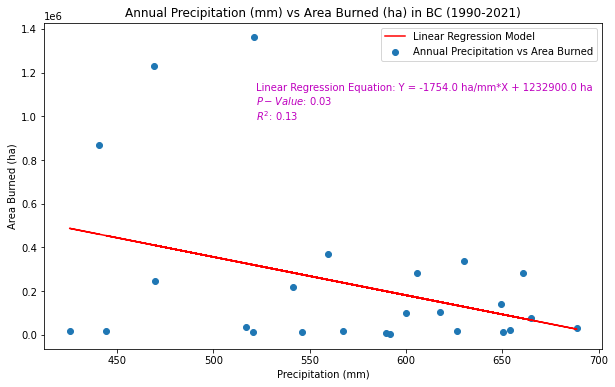

In [5]:
#load Precipitation data
percipdata = pd.read_csv ( "percipdata.csv", header=0) 
# load the Total Area Burned in Hectares in BC from 1990 to 2021
AreaBurnedData2021 = pd . read_csv ( "AreaBurnedOverall.csv" )
# y_area: Area Burned in BC as a NumPy array
y_area = AreaBurnedData2021 . iloc [:, 1 ]. to_numpy ()

# percip: Annual Precipitation (mm) as a Numpy array , y_areanew: Area Burned (ha) in BC as a Numpy array
percip = percipdata.iloc [:, 1 ].to_numpy ()
y_areanew = y_area[7:]

# add a column of ones to the x variables (required for statsmodel regression)
x_percip = sm.add_constant(percip)

# Linear regression on the Annual Precipitation vs Area Burned using the statsmodel 
# fit linear model to training data (drop missing values)
percip_model = sm.OLS(y_areanew, x_percip, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, Rsquare, p-value, and y-intercept respectively
percip_trend = round(percip_model.params[1],0)
percip_conf = percip_model.conf_int()[0]
percip_r2 = round(percip_model.rsquared,2)
percip_p = round(percip_model.pvalues[0],2)
percip_yint = round(percip_model.params[0],0)
print('FINAL OUTCOMES:')
print(" - Precipitation vs Area Burned TREND: " + str(percip_trend))
print(" - Precipitation vs Area Burned 95% CONFIDENCE INTERVAL: " + str(percip_conf))
print(" - Precipitation vs Area Burned R^2: " + str(percip_r2))
print(" - Precipitation vs Area Burned P-Value: " + str(percip_p))
print(" - Precipitation vs Area Burned Y-Int: " + str(percip_yint))

# create linear regression equation
percip_equation = "Y = " + str(percip_trend) + " ha/mm*X + " + str(percip_yint) + " ha"

# Plotting the Annual Precipitation vs Area Burned with linear regression
plt . figure ( figsize = (10 , 6) )
plt.scatter(percip, y_areanew, label = 'Annual Precipitation vs Area Burned')
plt.plot(percipdata . iloc [:, 1 ], percip_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate('Linear Regression Equation: ' + percip_equation + '\n$P-Value$: ' + str(percip_p) + "\n$R^2$: " + str(percip_r2), xy=(0.38, 0.7), xycoords='axes fraction', color='m')
plt . xlabel ( 'Precipitation (mm)' ) 
plt . ylabel ( 'Area Burned (ha)' ) 
plt . title ( 'Annual Precipitation (mm) vs Area Burned (ha) in BC (1990-2021)') 
plt . legend()
plt . show ()

**Key Findings**
- Given that P-value is 0.03, the linear regression model is considered statistically significant
    - A p-value of 0.05 or lower is generally considered statistically significant.
- Given that the R^2 is 0.13, the linear regression model predicts 13% of the relationship between Annual Precipitation (mm) vs Area Burned (ha) in BC
- Overall: Linear regression shows a significant correlation between the two variables with low model predictions. 